Luca's Contribution

In [1]:
import pandas as pd

# na_values Turns values into NaN
data = pd.read_csv('/content/CSCS_data_anon.csv',
                   na_values=["9999", "", " ", "Presented but no response", "NA"],
                   low_memory=False)

# data = pd.read_csv('../Datasets/CSCS_data_anon.csv',
#                    na_values=["9999", "", " ", "Presented but no response", "NA"],
#                    low_memory=False)
#cols = pd.read_csv('../Datasets/var_names.csv')
cols = pd.read_csv('/content/var_names.csv')


empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

In [2]:
df = data[data['DATASET'] == '2022 Cohort'].copy()

In [3]:
df_happinessScale_numFriends_shy = df[['CONNECTION_social_barriers_shy',
                                     'WELLNESS_subjective_happiness_scale_score',
                                     'CONNECTION_social_num_close_friends',
                                     'DATASET']].copy()

In [4]:
df_happinessScale_numFriends_shy.WELLNESS_subjective_happiness_scale_score.unique()

array([5.25, 6.  , 4.5 , 6.25, 3.25, 3.  , 4.25, 3.5 , 5.75, 5.5 , 3.75,
       2.  , 5.  , 4.75, 6.5 ,  nan, 6.75, 2.5 , 4.  , 2.25, 2.75, 7.  ,
       1.5 , 1.75, 1.25, 1.  ])

In [5]:
df_happinessScale_numFriends_shy.CONNECTION_social_num_close_friends.unique()

array([18.,  5.,  7.,  2.,  6., 17.,  4.,  1.,  0., 15.,  3., 20., 10.,
       nan, 12.,  8.,  9., 11., 14., 13.])

In [6]:
df_happinessScale_numFriends_shy.shape

(493, 4)

In [7]:
df_happinessScale_numFriends_shy.isna().sum()

,0
CONNECTION_social_barriers_shy,67
WELLNESS_subjective_happiness_scale_score,40
CONNECTION_social_num_close_friends,36
DATASET,0


In [8]:
df_happinessScale_numFriends_shy.dropna(inplace=True)

In [9]:
df_happinessScale_numFriends_shy.isna().sum()

,0
CONNECTION_social_barriers_shy,0
WELLNESS_subjective_happiness_scale_score,0
CONNECTION_social_num_close_friends,0
DATASET,0


In [10]:
df_happinessScale_numFriends_shy.shape

(413, 4)

In [11]:
df_happinessScale_numFriends_shy.dtypes

,0
CONNECTION_social_barriers_shy,object
WELLNESS_subjective_happiness_scale_score,float64
CONNECTION_social_num_close_friends,float64
DATASET,object


In [12]:
df_happinessScale_numFriends_shy.CONNECTION_social_barriers_shy.unique()

array(['Not Selected', 'I am shy'], dtype=object)

In [13]:
df_happinessScale_numFriends_shy.describe()

,WELLNESS_subjective_happiness_scale_score,CONNECTION_social_num_close_friends
count,413.000000,413.000000
mean,4.440073,4.503632
std,1.385128,3.660085
min,1.000000,0.000000
25%,3.500000,2.000000
50%,4.500000,4.000000
75%,5.500000,5.000000
max,7.000000,20.000000


In [15]:
import plotly.express as px
import pandas as pd
import numpy as np

# Assuming df_happinessScale_numFriends is your DataFrame
# Filter and ensure data is within the correct range
df = df_happinessScale_numFriends_shy[df_happinessScale_numFriends_shy['WELLNESS_subjective_happiness_scale_score'].isin(range(1, 8))]

# Calculate mean and standard deviation
mean_value = df['WELLNESS_subjective_happiness_scale_score'].mean()
std_dev = df['WELLNESS_subjective_happiness_scale_score'].std()

# Create the histogram
fig = px.histogram(
    df,
    x='WELLNESS_subjective_happiness_scale_score',
    title='Distribution of Subjective Happiness Scale',
    labels={'WELLNESS_subjective_happiness_scale_score': 'Happiness Score'},
    color_discrete_sequence=['mediumpurple'],
    category_orders={'WELLNESS_subjective_happiness_scale_score': [1, 2, 3, 4, 5, 6, 7]},  # Ensure custom order
    barnorm='',  # Ensures it is treated as a count histogram, not normalized
    nbins=7  # Specifies the number of bins directly
)

# Customize layout to have no gaps between bins
fig.update_layout(
    xaxis_title='Happiness score',
    yaxis_title='Count',
    bargap=0.0  # Set bargap to 0 for no gaps between bars
)

# Add a vertical line for the mean
fig.add_vline(x=mean_value, line_color="red", annotation_text="Mean", annotation_position="top")

# Add a shaded rectangle for the standard deviation
fig.add_vrect(
    x0=mean_value - std_dev, x1=mean_value + std_dev,
    fillcolor="blue", opacity=0.2,
    layer="below", line_width=0,
    annotation_text="Std Dev", annotation_position="top left"
)

# Show the plot
fig.show()


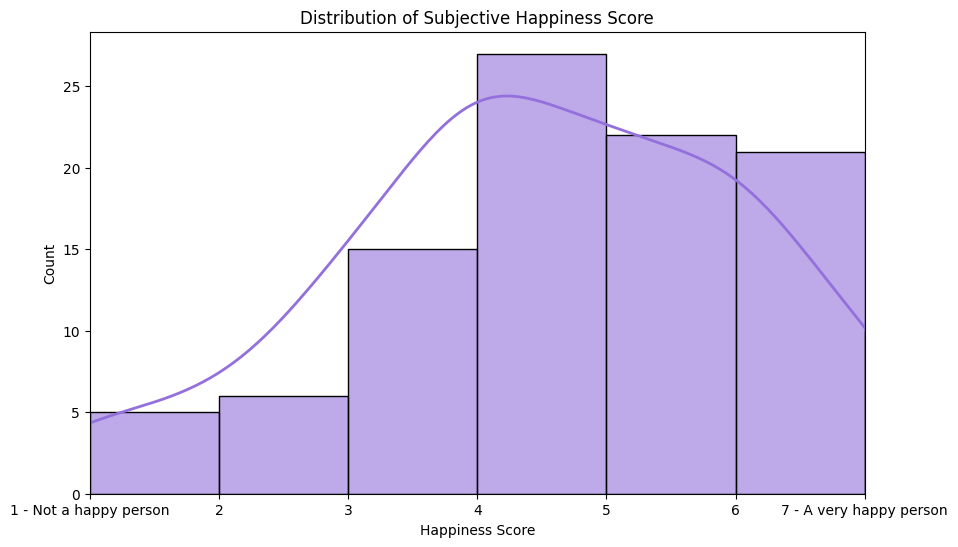

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_happinessScale_numFriends is your DataFrame
# Make sure the column contains only numeric data [1-7] for accurate plotting

# Filter the DataFrame to exclude non-numeric or out-of-scale values
df = df_happinessScale_numFriends_shy[df_happinessScale_numFriends_shy['WELLNESS_subjective_happiness_scale_score'].isin(range(1, 8))]

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Create a histogram and KDE plot
sns.histplot(df['WELLNESS_subjective_happiness_scale_score'], kde=True,
             bins=range(1, 9),  # Adjust the bins to cover from 1 to 7
             color="mediumpurple", alpha=0.6, line_kws={'linewidth': 2})

# Adding labels and title
plt.title('Distribution of Subjective Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Count')

# Customize x-ticks for clarity
plt.xticks(ticks=range(1, 8), labels=[
    '1 - Not a happy person', '2', '3', '4', '5', '6', '7 - A very happy person'])

# Set x-axis limits to ensure it only shows 1 to 7
plt.xlim(1, 7)

# Show the plot
plt.show()


In [18]:
import plotly.express as px

# Assuming df_happinessScale_numFriends is your DataFrame
# Create the histogram
fig = px.histogram(
    df_happinessScale_numFriends_shy,
    x='CONNECTION_social_num_close_friends',
    title='Distribution of Number of Close Friends',
    labels={'CONNECTION_social_num_close_friends': 'Number of close friends'},
    color_discrete_sequence=['mediumpurple']
)

# Customize layout to have no gaps between bins
fig.update_layout(
    xaxis_title='Number of Close Friends',
    yaxis_title='Count',
    bargap=0.0  # Set bargap to 0 for no gaps between bars
)

# Calculate mean and standard deviation
mean_value = df_happinessScale_numFriends_shy['CONNECTION_social_num_close_friends'].mean()
std_dev = df_happinessScale_numFriends_shy['CONNECTION_social_num_close_friends'].std()

# Add a vertical line for the mean
fig.add_vline(x=mean_value, line_color="red", annotation_text="Mean", annotation_position="top")

# Add a shaded rectangle for the standard deviation
fig.add_vrect(
    x0=mean_value - std_dev, x1=mean_value + std_dev,
    fillcolor="blue", opacity=0.2,
    layer="below", line_width=0,
    annotation_text="Std Dev", annotation_position="top left"
)

# Show the plot
fig.show()


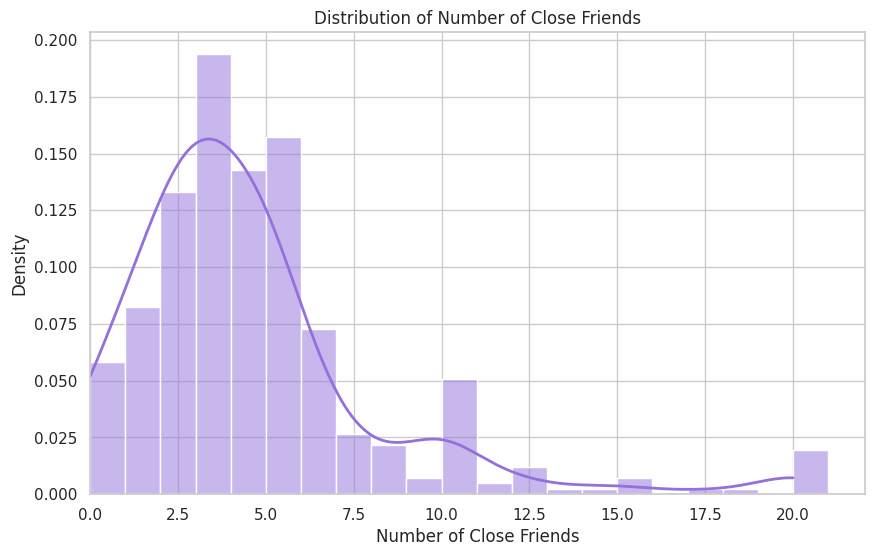

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_happinessScale_numFriends is your DataFrame and CONNECTION_social_num_close_friends is your column

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot histogram and KDE
bins = np.arange(0, df_happinessScale_numFriends_shy['CONNECTION_social_num_close_friends'].max() + 2)  # Each bin goes from n to n+1

sns.histplot(data=df_happinessScale_numFriends_shy, x='CONNECTION_social_num_close_friends', kde=True,
             color="mediumpurple", bins=bins, stat='density', line_kws={'linewidth': 2})

# Adding labels and title
plt.title('Distribution of Number of Close Friends')
plt.xlabel('Number of Close Friends')
plt.ylabel('Density')

# Set the x-axis to start at 0
plt.xlim(left=0)

# Show the plot
plt.show()


In [21]:
import pandas as pd
import plotly.express as px

# Create bins for happiness scale (0-1, 1-2, 2-3, ...)
bins = range(0, 11)  # Assuming the scale is from 0 to 10
labels = [f'{i}-{i+1}' for i in bins[:-1]]

# Bin the happiness scale into intervals
df_happinessScale_numFriends_shy['Happiness_Interval'] = pd.cut(
    df_happinessScale_numFriends_shy['WELLNESS_subjective_happiness_scale_score'],
    bins=bins,
    labels=labels,
    right=False  # Include the left edge, exclude the right
)

# Create the box plot
fig = px.box(
    df_happinessScale_numFriends_shy,
    x='Happiness_Interval',
    y='CONNECTION_social_num_close_friends',
    title='Number of Friends by Happiness Score Intervals',
    labels={
        'Happiness_Interval': 'Happiness Score Intervals',
        'CONNECTION_social_num_close_friends': 'Number of Close Friends'
    },
    category_orders={'Happiness_Interval': labels}  # Ensure intervals are ordered
)

# Customize layout
fig.update_layout(
    xaxis_title='Happiness Scale Intervals',
    yaxis_title='Number of Close Friends'
)

# Show the plot
fig.show()


In [23]:
import plotly.express as px

# Assuming df_happinessScale_numFriends is your DataFrame
# Filter and ensure data is within the correct range
df = df_happinessScale_numFriends_shy[df_happinessScale_numFriends_shy['WELLNESS_subjective_happiness_scale_score'].isin(range(1, 8))]

# Create the histogram for the 'CONNECTION_social_barriers_shy' column
fig = px.histogram(
    df,
    x='CONNECTION_social_barriers_shy',
    title='Distribution of Social Barriers (Shyness)',
    labels={'CONNECTION_social_barriers_shy': 'Social Barriers (Shyness)'},
    color_discrete_sequence=['mediumpurple'],
    barnorm='',  # Ensures it is treated as a count histogram, not normalized
)

# Customize layout to have no gaps between bars
fig.update_layout(
    xaxis_title='Social Barriers (Shyness)',
    yaxis_title='Count',
    bargap=0.0  # Set bargap to 0 for no gaps between bars
)

# Show the plot
fig.show()


In [25]:
import plotly.express as px

# Assuming df_happinessScale_numFriends is your DataFrame
# Filter and ensure data is within the correct range
df = df_happinessScale_numFriends_shy[df_happinessScale_numFriends_shy['WELLNESS_subjective_happiness_scale_score'].isin(range(1, 8))]

# Create the box plot split by the 'CONNECTION_social_barriers_shy' variable
fig = px.box(
    df,
    x='CONNECTION_social_barriers_shy',  # Shyness variable on the x-axis
    y='WELLNESS_subjective_happiness_scale_score',  # Happiness score on the y-axis
    title='Happiness Score by Shyness (Social Barriers)',
    labels={'CONNECTION_social_barriers_shy': 'Shyness (Social Barriers)',
            'WELLNESS_subjective_happiness_scale_happy': 'Happiness Scale'},
    color='CONNECTION_social_barriers_shy',  # Coloring by shyness group
    color_discrete_map={'Yes': 'mediumpurple', 'No': 'lightgreen'},  # Customize colors
)

# Customize layout
fig.update_layout(
    xaxis_title='Shyness (Social Barriers)',
    yaxis_title='Happiness Score',
    showlegend=False  # Disable the legend if it's not needed
)

# Show the plot
fig.show()


                                        OLS Regression Results                                       
Dep. Variable:     WELLNESS_subjective_happiness_scale_score   R-squared:                       0.106
Model:                                                   OLS   Adj. R-squared:                  0.104
Method:                                        Least Squares   F-statistic:                     48.96
Date:                                       Thu, 28 Nov 2024   Prob (F-statistic):           1.07e-11
Time:                                               23:45:44   Log-Likelihood:                -696.83
No. Observations:                                        413   AIC:                             1398.
Df Residuals:                                            411   BIC:                             1406.
Df Model:                                                  1                                         
Covariance Type:                                   nonrobust                      

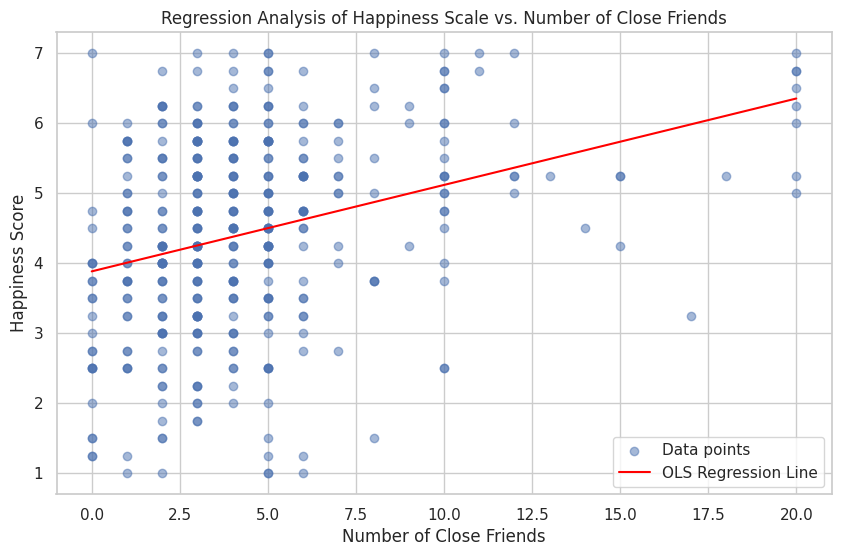

In [26]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Assuming df_happinessScale_numFriends is your DataFrame
# Preparing the data
X = df_happinessScale_numFriends_shy['CONNECTION_social_num_close_friends']  # Predictor
y = df_happinessScale_numFriends_shy['WELLNESS_subjective_happiness_scale_score']  # Response

# Adding a constant to the predictor variable, necessary for statsmodels' OLS model
X = sm.add_constant(X)

# Fit an OLS model
model = sm.OLS(y, X).fit()

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(X['CONNECTION_social_num_close_friends'], y, alpha=0.5, label='Data points')

# Generating values for the regression line
x_pred = np.linspace(X['CONNECTION_social_num_close_friends'].min(), X['CONNECTION_social_num_close_friends'].max(), 50)
x_pred2 = sm.add_constant(x_pred)  # Need to add a constant to these as well

# Predicting y values for our line
y_pred = model.predict(x_pred2)

# Plotting the regression line
plt.plot(x_pred, y_pred, color='red', label='OLS Regression Line')

# Adding labels and title
plt.title('Regression Analysis of Happiness Scale vs. Number of Close Friends')
plt.xlabel('Number of Close Friends')
plt.ylabel('Happiness Score')
plt.legend()

print(model.summary())

# Show the plot
plt.show()


We can reject the null hypothesis that: There is no association between the number of close friends and happiness levels. Therefore there seems to be a correlation between the number of friends someone has and their subjective happiness scale.

A 0.097 R^2 value suggests that there are other variables or factors that affect happiness. We can use multi-linear regression to try and increase the R-squared value and then try to predict peoples levels of happiness based on other variables.

People who have 0 friends tend to be 4.23 / 7 on a happiness scale. For every increase in 7 friends, the happiness scale rises approximately 1 point.

In [27]:
import statsmodels.formula.api as smf

linear_model_specification = '''
Q('WELLNESS_subjective_happiness_scale_score') ~
    CONNECTION_social_num_close_friends +
    CONNECTION_social_barriers_shy
'''
model = smf.ols(linear_model_specification, df_happinessScale_numFriends_shy)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                          
==========================================================================================================
Dep. Variable:     Q('WELLNESS_subjective_happiness_scale_score')   R-squared:                       0.165
Model:                                                        OLS   Adj. R-squared:                  0.161
Method:                                             Least Squares   F-statistic:                     40.41
Date:                                            Thu, 28 Nov 2024   Prob (F-statistic):           9.62e-17
Time:                                                    23:45:51   Log-Likelihood:                -682.92
No. Observations:                                             413   AIC:                             1372.
Df Residuals:                                                 410   BIC:                             1384.
Df Model:                                                       2                                         
Covariance Type:                                        nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          3.3537      0.140     23.916      0.000       3.078       3.629
CONNECTION_social_barriers_shy[T.Not Selected]     0.7817      0.146      5.345      0.000       0.494       1.069
CONNECTION_social_num_close_friends                0.1105      0.017      6.407      0.000       0.077       0.144
==============================================================================
Omnibus:                        7.231   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                7.406
Skew:                          -0.314   Prob(JB):                       0.0246
Kurtosis:                       2.807   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

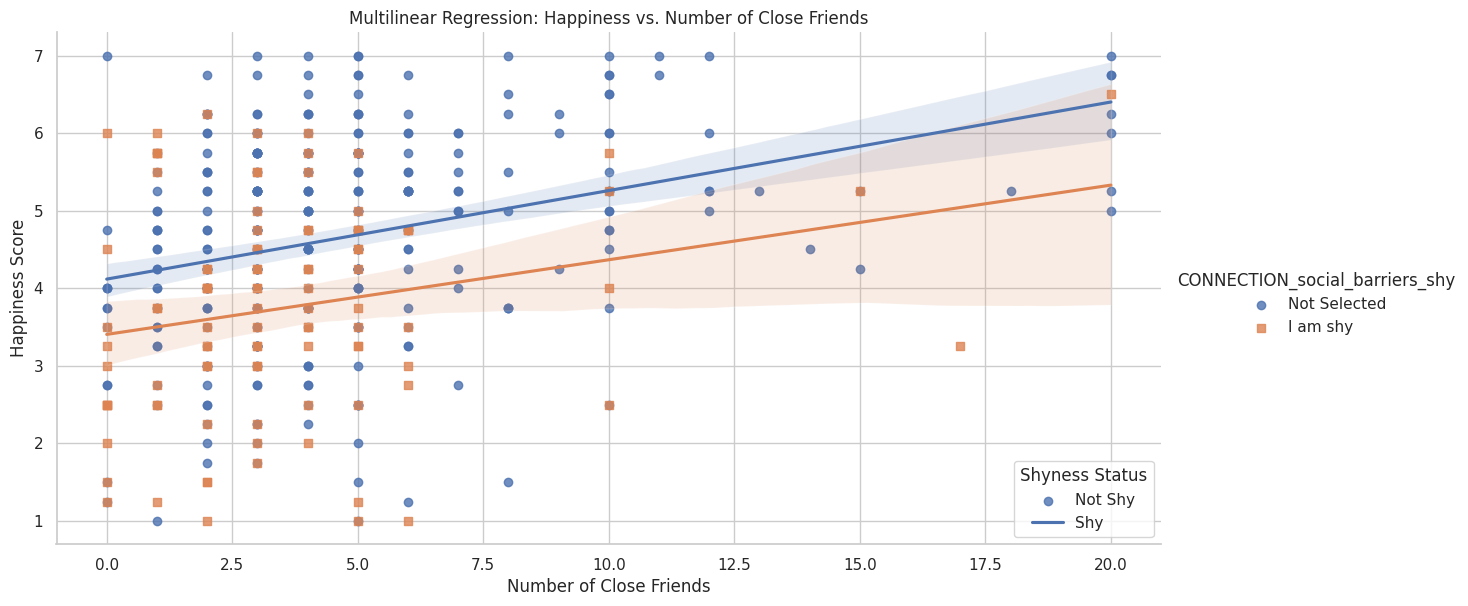

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a new column for predicted values based on the model
df_happinessScale_numFriends_shy['predicted_happiness'] = model_fit.predict(df_happinessScale_numFriends_shy)

# Plot the relationship between actual and predicted happiness, based on number of close friends
sns.lmplot(
    data=df_happinessScale_numFriends_shy,
    x='CONNECTION_social_num_close_friends',
    y='WELLNESS_subjective_happiness_scale_score',
    hue='CONNECTION_social_barriers_shy',  # This will color the lines based on 'shy' status
    markers=['o', 's'],
    aspect=2, height=6
)

# Customize the plot
plt.title('Multilinear Regression: Happiness vs. Number of Close Friends')
plt.xlabel('Number of Close Friends')
plt.ylabel('Happiness Score')

# Adjust the legend to make it clear which line is shy and which is not shy
plt.legend(title='Shyness Status', labels=['Not Shy', 'Shy'])

plt.show()


## **Ariel's Findings with Permutation Test**

<ipython-input-11-aea80cdfa76e>:13: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
<ipython-input-11-aea80cdfa76e>:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataV2_cohortV3_mapped = dataV2_cohortV3.replace(mapping)


Observed Difference in Means: -2.8968
P-value: 0.0384


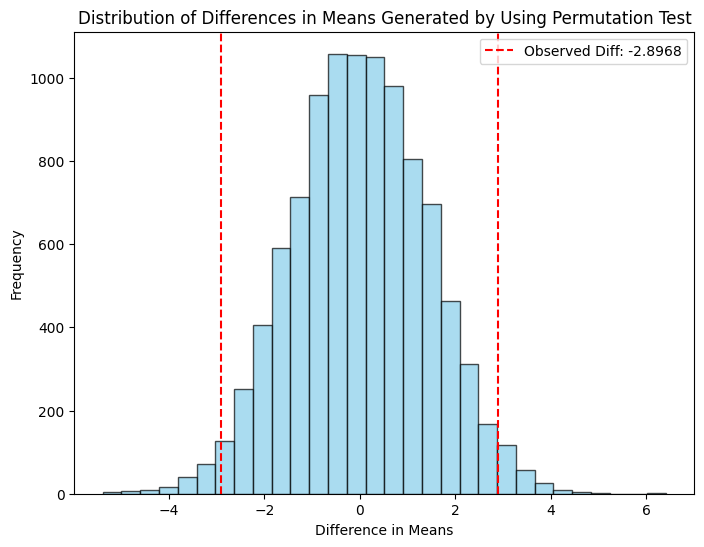

<ipython-input-11-aea80cdfa76e>:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


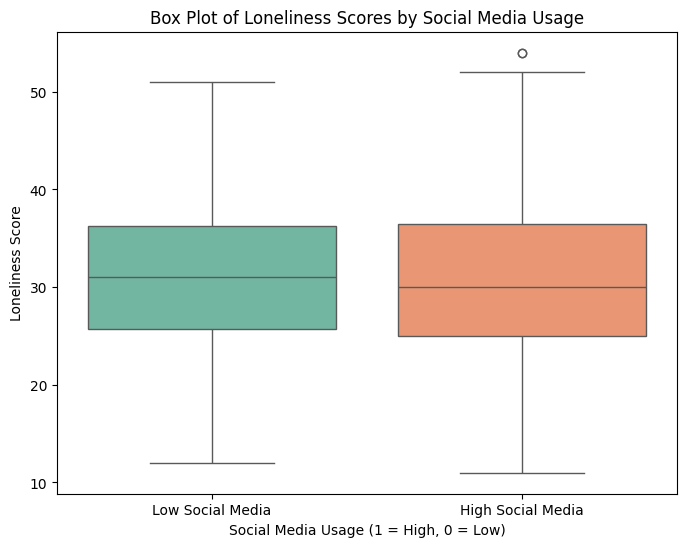

,Group,Mean Loneliness Score,Standard Deviation,Sample Size
0,High Social Media,29.617886,8.879448,123
1,Low Social Media,32.514706,10.060255,68


In [ ]:
# download these files from their original access point at the bottom of
# the CSCS webpage (https://casch.org/cscs) or the course github and access them locally
# "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv"
# "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

# Let's just keep the recommended data
dataV2 = data[data.REMOVE_case=='No'].copy()
# dataV2 = data.copy()

# And select out participants who are part of the cohort data
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()

# And remove columns that have less than 100 non-missing data
non_missingness_limit = 100
columns2keep = dataV2_cohort.notna().sum() >= non_missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV2 = dataV2_cohort[columns2keep].copy()

# Assuming 'dataV2_cohortV3' is already cleaned and the mapping is applied
mapping = {
    'More than 3 hours per day': 1,
    '2-3 hours per day': 1,
    '1-2 hours per day': 1,
    '31-60 minutes per day': 0,
    '10-30 minutes per day': 0,
    'Less than 10 minutes per day': 0
}


# Select only the relevant columns
dataV2_cohortV3 = dataV2_cohortV2[['CONNECTION_social_media_time_per_day', 'LONELY_existential_loneliness_scale_score']].copy()

# Apply mapping to the data
dataV2_cohortV3_mapped = dataV2_cohortV3.replace(mapping)

# Check the first few rows to confirm
dataV2_cohortV3_mapped.dropna(inplace=True)

dataV2_cohortV3_mapped

# Assuming 'dataV2_cohortV3_mapped' contains the data

# Extract relevant columns
social_media_data = dataV2_cohortV3_mapped[['CONNECTION_social_media_time_per_day', 'LONELY_existential_loneliness_scale_score']]

# Separate the groups
group_a = social_media_data[social_media_data['CONNECTION_social_media_time_per_day'] == 1]['LONELY_existential_loneliness_scale_score']
group_b = social_media_data[social_media_data['CONNECTION_social_media_time_per_day'] == 0]['LONELY_existential_loneliness_scale_score']

# Observed difference in means
observed_diff = group_a.mean() - group_b.mean()

# Permutation test simulation
n_simulations = 10000
combined = social_media_data['LONELY_existential_loneliness_scale_score'].values
n_group_a = len(group_a)

simulated_diffs = []

np.random.seed(42)

for _ in range(n_simulations):
    np.random.shuffle(combined)  # Shuffle the data
    sim_group_a = combined[:n_group_a]
    sim_group_b = combined[n_group_a:]
    sim_diff = sim_group_a.mean() - sim_group_b.mean()
    simulated_diffs.append(sim_diff)

# Calculate the p-value
simulated_diffs = np.array(simulated_diffs)
p_value = (np.sum(np.abs(simulated_diffs) >= np.abs(observed_diff)) / n_simulations)

# Display results
print(f"Observed Difference in Means: {observed_diff:.4f}")
print(f"P-value: {p_value:.4f}")

# Plot the distribution of simulated differences
plt.figure(figsize=(8, 6))
plt.hist(simulated_diffs, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(observed_diff, color='red', linestyle='dashed', label=f"Observed Diff: {observed_diff:.4f}")
plt.axvline(-observed_diff, color='red', linestyle='dashed')
plt.title("Distribution of Differences in Means Generated by Using Permutation Test")
plt.xlabel("Difference in Means")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Create a box plot for the two groups
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='CONNECTION_social_media_time_per_day',
    y='LONELY_existential_loneliness_scale_score',
    data=social_media_data,
    palette='Set2'
)
plt.title("Box Plot of Loneliness Scores by Social Media Usage")
plt.xlabel("Social Media Usage (1 = High, 0 = Low)")
plt.ylabel("Loneliness Score")
plt.xticks([0, 1], ['Low Social Media', 'High Social Media'])
plt.show()

# Summary statistics for the table
summary_stats = pd.DataFrame({
    "Group": ["High Social Media", "Low Social Media"],
    "Mean Loneliness Score": [group_a.mean(), group_b.mean()],
    "Standard Deviation": [group_a.std(), group_b.std()],
    "Sample Size": [len(group_a), len(group_b)]
})

summary_stats


## **Kitas's Findings with Multiple Linear Regression**

In [ ]:
# download these files from their original access point at the bottom of
# the CSCS webpage (https://casch.org/cscs) or the course github and access them locally
# "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv"
# "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv"

import pandas as pd
import statsmodels.formula.api as smf

data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

# Let's just keep the recommended data
dataV2 = data[data.REMOVE_case=='No'].copy()
# dataV2 = data.copy()

# And select out participants who are part of the cohort data
# (but may also be a part of the cross-sectional data)
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()

# And remove columns that have less than 100 non-missing values
non_missingness_limit = 100
columns2keep = dataV2_cohort.notna().sum() >= non_missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV2 = dataV2_cohort[columns2keep].copy()

# filtered data for MLR
dataV2_cohortV3 = dataV2_cohortV2[['WELLNESS_subjective_happiness_scale_score',
                                  'CONNECTION_social_barriers_no_people', 'CONNECTION_social_barriers_alienated',
                                  'LONELY_ucla_loneliness_scale_score',
                                  'LONELY_dejong_emotional_loneliness_sub_scale_score',
                                  'LONELY_dejong_social_loneliness_sub_scale_score',
                                  'LONELY_existential_loneliness_scale_score']].copy()
dataV2_cohortV3.dropna(inplace=True)
for names in dataV2_cohortV3.columns:
    if names.startswith('CONNECTION_social_barriers'):
        dataV2_cohortV3[names] = (dataV2_cohortV3[names] != 'Not Selected').astype(int)

# MLR model fitting
model = '''
WELLNESS_subjective_happiness_scale_score ~
LONELY_dejong_emotional_loneliness_sub_scale_score + LONELY_dejong_social_loneliness_sub_scale_score
'''

for names in dataV2_cohortV3.columns:
    if not (names.startswith('LONELY_dejong') or names == 'WELLNESS_subjective_happiness_scale_score'):
        model = model + ' + '
        model = model + names

reg = smf.ols(formula=model, data=dataV2_cohortV3).fit()
reg.summary()

<ipython-input-2-56c7477cded2>:10: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     WELLNESS_subjective_happiness_scale_score   R-squared:                       0.439
Model:                                                   OLS   Adj. R-squared:                  0.430
Method:                                        Least Squares   F-statistic:                     50.07
Date:                                       Wed, 27 Nov 2024   Prob (F-statistic):           2.35e-45
Time:                                               04:14:09   Log-Likelihood:                -571.55
No. Observations:                                        391   AIC:                             1157.
Df Residuals:                                            384   BIC:                             1185.
Df Model:                                                  6                                         
Covariance Type:                                   nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              7.1197      0.227     31.386      0.000       6.674       7.566
LONELY_dejong_emotional_loneliness_sub_scale_score    -0.3561      0.073     -4.907      0.000      -0.499      -0.213
LONELY_dejong_social_loneliness_sub_scale_score       -0.1684      0.052     -3.265      0.001      -0.270      -0.067
CONNECTION_social_barriers_no_people                  -0.2816      0.126     -2.243      0.025      -0.528      -0.035
CONNECTION_social_barriers_alienated                  -0.3219      0.154     -2.085      0.038      -0.626      -0.018
LONELY_ucla_loneliness_scale_score                    -0.1014      0.042     -2.421      0.016      -0.184      -0.019
LONELY_existential_loneliness_scale_score             -0.0344      0.006     -5.363      0.000      -0.047      -0.022
==============================================================================
Omnibus:                        2.579   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                2.318
Skew:                          -0.157   Prob(JB):                        0.314
Kurtosis:                       3.210   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# R^2 testing

# from sklearn.model_selection import train_test_split
# import numpy as np

# dataV2_cohortV3_train, dataV2_cohortV3_test = train_test_split(dataV2_cohortV3, test_size=0.2, random_state=42)
# reg = smf.ols(formula=model, data=dataV2_cohortV3_train).fit()

# X_test = dataV2_cohortV3_test.drop(['WELLNESS_subjective_happiness_scale_score'], axis=1)

# np.corrcoef(reg.predict(X_test), dataV2_cohortV3_test['WELLNESS_subjective_happiness_scale_score'])[0,1]**2

<ipython-input-3-94e97740aa99>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=coefficients.index, y=coefficients.values, palette='viridis', ci=None)
<ipython-input-3-94e97740aa99>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.index, y=coefficients.values, palette='viridis', ci=None)


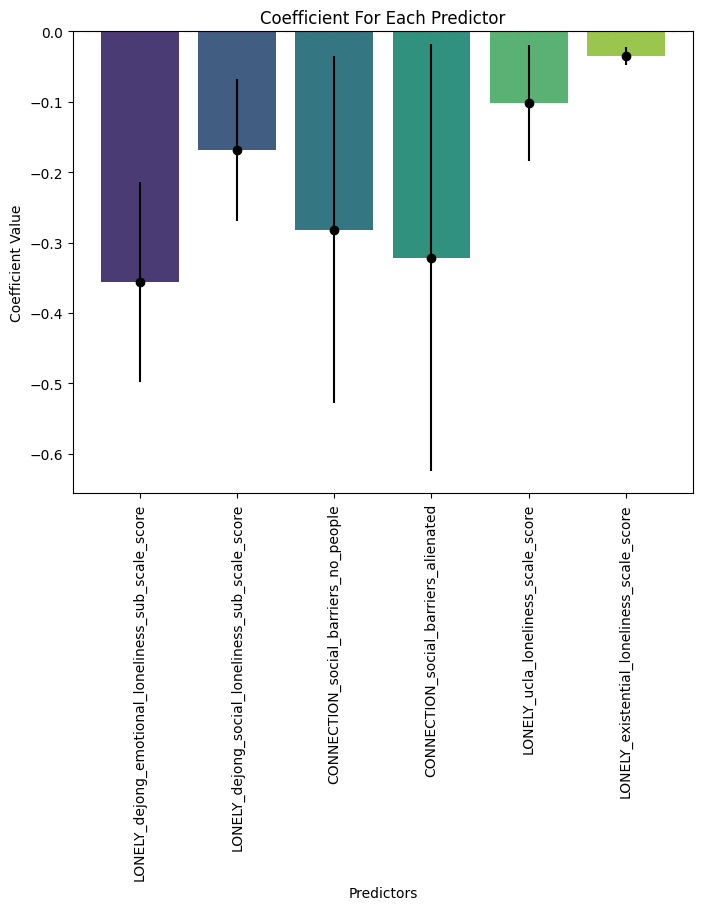

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

coefficients = reg.params.drop('Intercept')

conf_int = reg.conf_int().loc[coefficients.index]

# Add confidence intervals to the plot
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, palette='viridis', ci=None)
plt.errorbar(coefficients.index, coefficients.values,
             yerr=(conf_int[1] - coefficients), fmt='o', color='black')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predictors')
plt.ylabel('Coefficient Value')
plt.title('Coefficient For Each Predictor')
plt.xticks(rotation=90)
plt.show()

## **Samario's (and Kitas's) Findings with Multiple Logistic Regression**

In [ ]:
# download these files from their original access point at the bottom of
# the CSCS webpage (https://casch.org/cscs) or the course github and access them locally
# "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv"
# "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv"

import pandas as pd
import statsmodels.formula.api as smf

data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

# Let's just keep the recommended data
dataV2 = data[data.REMOVE_case=='No'].copy()
# dataV2 = data.copy()

# And select out participants who are part of the cohort data
# (but may also be a part of the cross-sectional data)
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()

# And remove columns that have less than 100 non-missing values
non_missingness_limit = 100
columns2keep = dataV2_cohort.notna().sum() >= non_missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV2 = dataV2_cohort[columns2keep].copy()

# filtered data for the logistic regression
dataV2_cohortV4 = dataV2_cohortV2[['WELLNESS_phq_score_y_n', 'PSYCH_zimet_multidimensional_social_support_scale_score',
                                  'PSYCH_ten_item_personality_inventory_emotional_stability_score']].copy()

dataV2_cohortV4.dropna(inplace=True)
dataV2_cohortV4['WELLNESS_phq_score_y_n_bin'] = pd.get_dummies(
    dataV2_cohortV4['WELLNESS_phq_score_y_n'])['Yes (3-6)'].astype(int)
cat = {'Once or twice a year': 0, 'Once or twice a month': 0, 'Once or twice a week': 0, 'Never': 0,
       'Many times a week': 1, 'Many times a day': 1, "Every day": 1, 'Yes': 1, 'No': 0}
dataV2_cohortV4.replace(cat, inplace=True)

# fit the logistic regression
model = '''
WELLNESS_phq_score_y_n_bin ~ PSYCH_zimet_multidimensional_social_support_scale_score +
PSYCH_ten_item_personality_inventory_emotional_stability_score
'''

reg2 = smf.logit(formula=model, data=dataV2_cohortV4).fit()
reg2.summary()

<ipython-input-14-d4ac32557fbc>:9: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


Optimization terminated successfully.
         Current function value: 0.513670
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     WELLNESS_phq_score_y_n_bin   No. Observations:                  190
Model:                                  Logit   Df Residuals:                      187
Method:                                   MLE   Df Model:                            2
Date:                        Wed, 27 Nov 2024   Pseudo R-squ.:                  0.2259
Time:                                04:38:07   Log-Likelihood:                -97.597
converged:                               True   LL-Null:                       -126.07
Covariance Type:                    nonrobust   LLR p-value:                 4.294e-13
==================================================================================================================================
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          4.8528      0.875      5.545      0.000       3.138       6.568
PSYCH_zimet_multidimensional_social_support_scale_score           -0.7197      0.154     -4.679      0.000      -1.021      -0.418
PSYCH_ten_item_personality_inventory_emotional_stability_score    -0.4644      0.115     -4.034      0.000      -0.690      -0.239
==================================================================================================================================
"""

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Create a grid of predictor values (range of values for each predictor)
x1 = np.linspace(dataV2_cohortV4['PSYCH_zimet_multidimensional_social_support_scale_score'].min(),
                dataV2_cohortV4['PSYCH_zimet_multidimensional_social_support_scale_score'].max(), 100)

x2 = np.linspace(dataV2_cohortV4['PSYCH_ten_item_personality_inventory_emotional_stability_score'].min(),
                dataV2_cohortV4['PSYCH_ten_item_personality_inventory_emotional_stability_score'].max(), 100)

X1, X2 = np.meshgrid(x1, x2)

# Create a DataFrame of the grid and calculate predicted probabilities
grid = pd.DataFrame({'PSYCH_zimet_multidimensional_social_support_scale_score': X1.ravel(),
                     'PSYCH_ten_item_personality_inventory_emotional_stability_score': X2.ravel()})

grid['predicted_prob'] = reg2.predict(grid)

# Reshape predicted probabilities for plotting
Z = grid['predicted_prob'].values.reshape(X1.shape)

# Actual data points (use the actual data in your dataset)
x1_actual = dataV2_cohortV4['PSYCH_zimet_multidimensional_social_support_scale_score']
x2_actual = dataV2_cohortV4['PSYCH_ten_item_personality_inventory_emotional_stability_score']
z_actual = dataV2_cohortV4['WELLNESS_phq_score_y_n_bin']  # Actual outcomes (binary)

# Set the colors for the markers (use a custom color scale or specific colors for 0 and 1)
marker_colors = ['blue' if value == 1 else 'red' for value in z_actual]  # Red for 0, Blue for 1

# Create the 3D surface plot and scatter plot
fig = go.Figure()

# Add the surface plot (predicted probabilities)
fig.add_trace(go.Surface(z=Z, x=X1, y=X2, colorscale='Viridis', opacity=0.7))

# Add the scatter plot (actual data points)
fig.add_trace(go.Scatter3d(
    x=x1_actual,
    y=x2_actual,
    z=z_actual,
    mode='markers',
    marker=dict(
        size=5,
        color=marker_colors,
        opacity=0.9
    ),
    name='Actual Data Points'
))

# Update layout to add titles and labels
fig.update_layout(
    title='3D Surface Plot of Predicted Probabilities with Actual Data Points',
    scene=dict(
        xaxis_title='Social Support Score',
        yaxis_title='Emotional Stability Score',
        zaxis_title='Predicted Probability'
    ),
    autosize=True
)

# Show the plot
fig.show()


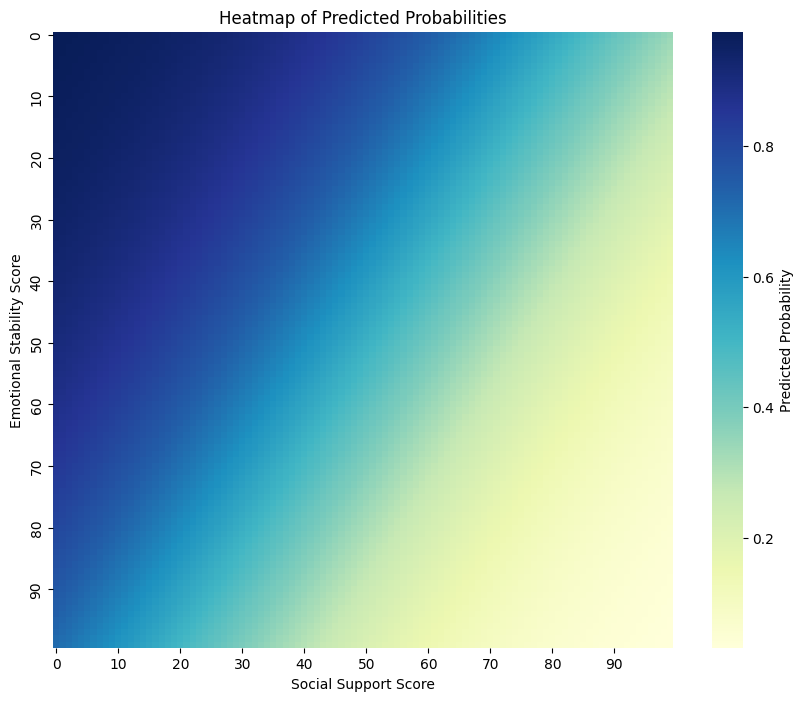

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid of predictor values (range of values for each predictor)
x1 = np.linspace(dataV2_cohortV4['PSYCH_zimet_multidimensional_social_support_scale_score'].min(),
                dataV2_cohortV4['PSYCH_zimet_multidimensional_social_support_scale_score'].max(), 100)

x2 = np.linspace(dataV2_cohortV4['PSYCH_ten_item_personality_inventory_emotional_stability_score'].min(),
                dataV2_cohortV4['PSYCH_ten_item_personality_inventory_emotional_stability_score'].max(), 100)

X1, X2 = np.meshgrid(x1, x2)

# Create a DataFrame of the grid and calculate predicted probabilities
grid = pd.DataFrame({'PSYCH_zimet_multidimensional_social_support_scale_score': X1.ravel(),
                     'PSYCH_ten_item_personality_inventory_emotional_stability_score': X2.ravel()})

grid['predicted_prob'] = reg2.predict(grid)

# Reshape predicted probabilities for heatmap plotting
Z = grid['predicted_prob'].values.reshape(X1.shape)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(Z, xticklabels=10, yticklabels=10, cmap='YlGnBu', cbar_kws={'label': 'Predicted Probability'})
plt.title('Heatmap of Predicted Probabilities')
plt.xlabel('Social Support Score')
plt.ylabel('Emotional Stability Score')

# Show the plot
plt.show()